In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Any results you write to the current directory are saved as output.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/GAN/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/GAN/data/corrected.gz
/content/drive/MyDrive/GAN/data/kddcup.data.corrected
/content/drive/MyDrive/GAN/data/kddcup.data.gz
/content/drive/MyDrive/GAN/data/kddcup.data_10_percent.gz
/content/drive/MyDrive/GAN/data/kddcup.data_10_percent_corrected
/content/drive/MyDrive/GAN/data/kddcup.newtestdata_10_percent_unlabeled.gz
/content/drive/MyDrive/GAN/data/kddcup.names
/content/drive/MyDrive/GAN/data/kddcup.testdata.unlabeled.gz
/content/drive/MyDrive/GAN/data/kddcup.testdata.unlabeled_10_percent.gz
/content/drive/MyDrive/GAN/data/training_attack_types
/content/drive/MyDrive/GAN/data/typo-correction.txt
/content/drive/MyDrive/GAN/data/corrected/corrected
/content/drive/MyDrive/GAN/data/kddcup.data/kddcup.data
/content/drive/MyDrive/GAN/data/kddcup.data_10_percent/kddcup.data_10_percent
/content/drive/MyDrive/GAN/data/kddcup.newtestdata_10_percent_unlabeled/kddcup.newtestdata_10_percent_unlabeled
/content/drive/MyDrive/GAN/data/kddcup.testdata.unlabeled/kddcup.testdata.

In [ ]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
dtypes = {
"duration": np.int8,
"protocol_type": np.object,
"service": np.object,
"flag": np.object,
"src_bytes":  np.int8,
"dst_bytes":  np.int8,
"land": np.int8,
"wrong_fragment":  np.int8,
"urgent": np.int8,
"hot": np.int8,
"m_failed_logins":  np.int8,
"logged_in":  np.int8,
"num_compromised":  np.int8,
"root_shell":  np.int8,
"su_attempted":  np.int8,
"num_root": np.int8,
"num_file_creations":  np.int8,
"num_shells":  np.int8,
"num_access_files":  np.int8,
"num_outbound_cmds":  np.int8,
"is_host_login":  np.int8,
"is_guest_login":  np.int8,
"count": np.int8,
"srv_count":  np.int8,
"serror_rate": np.float16,
"srv_serror_rate": np.float16,
"rerror_rate": np.float16,
"srv_rerror_rate": np.float16,
"same_srv_rate": np.float16,
"diff_srv_rate": np.float16,
"srv_diff_host_rate": np.float16,
"dst_host_count":  np.int8,
"dst_host_srv_count":  np.int8,
"dst_host_same_srv_rate": np.float16,
"dst_host_diff_srv_rate": np.float16,
"dst_host_same_src_port_rate": np.float16,
"dst_host_srv_diff_host_rate": np.float16,
"dst_host_serror_rate": np.float16,
"dst_host_srv_serror_rate": np.float16,
"dst_host_rerror_rate": np.float16,
"dst_host_srv_rerror_rate": np.float16,
"label": np.object
}

columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]

df = pd.read_csv("/content/drive/MyDrive/GAN/data/kddcup.data_10_percent_corrected", sep=",", names=columns, dtype=dtypes, index_col=None)

<ipython-input-6-7d5d8e4938c2>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "protocol_type": np.object,
<ipython-input-6-7d5d8e4938c2>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "service": np.object,
<ipython-input-6-7d5d8e4938c2>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guid

In [ ]:
df.label.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [ ]:
#Feature Selection
new_features=['dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate','label']

In [ ]:
# 0 for normal data and 1 for abnormalities
df.label=df.label.apply(lambda x: 0 if x == 'normal.' else 1)

In [ ]:
df=df[new_features]

In [ ]:
#label encoding 
for column in df.columns:
    if df[column].dtype == np.object:+ 
        encoded = LabelEncoder()
        
        encoded.fit(df[column])
        df[column] = encoded.transform(df[column])

<ipython-input-11-b4e9156a599a>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:


In [ ]:
#randomly sample 500 data point for training
df_train=df[df.label==0].sample(500)

In [ ]:
#remove the item sampled from our dataset
index_list=df_train.index
df=df.drop(index_list)

In [ ]:
#drop the label columns
df_train=df_train.drop('label',axis=1)

In [ ]:
df_train.shape

(500, 8)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    assert model.output_shape == (None,16 ) # Note: None is the batch size
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(8))
    assert model.output_shape == (None,8 )
   
    
    return model

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False,
                                    input_shape=[8]))
   
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

   
    model.add(layers.Dense(1))
   # model.add(layers.Softmax())

    return model

In [ ]:
generator=make_generator_model()
discriminator=make_discriminator_model()

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])
print('Loss: ', loss.numpy())  # Loss: 11.522857

Loss:  0.0


In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
EPOCHS =300

noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 64



In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,(1,8))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
     
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss,disc_loss)

In [ ]:
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [ ]:
x_train=df_train.values
train(x_train,EPOCHS) 

Time for epoch 1 is 2.839331865310669 sec 
Time for epoch 2 is 1.264911413192749 sec 
Time for epoch 3 is 1.8868844509124756 sec 
Time for epoch 4 is 1.8100383281707764 sec 
Time for epoch 5 is 1.404660940170288 sec 
Time for epoch 6 is 1.1595845222473145 sec 
Time for epoch 7 is 1.1573121547698975 sec 
Time for epoch 8 is 1.1616027355194092 sec 
Time for epoch 9 is 1.1584253311157227 sec 
Time for epoch 10 is 1.160010814666748 sec 
Time for epoch 11 is 1.183680772781372 sec 
Time for epoch 12 is 1.2037124633789062 sec 
Time for epoch 13 is 1.1892244815826416 sec 
Time for epoch 14 is 1.8918774127960205 sec 
Time for epoch 15 is 2.0236809253692627 sec 
Time for epoch 16 is 1.3307719230651855 sec 
Time for epoch 17 is 1.1591856479644775 sec 
Time for epoch 18 is 1.1340792179107666 sec 
Time for epoch 19 is 1.1510100364685059 sec 
Time for epoch 20 is 1.153132677078247 sec 
Time for epoch 21 is 1.1464927196502686 sec 
Time for epoch 22 is 1.207902193069458 sec 
Time for epoch 23 is 1.172

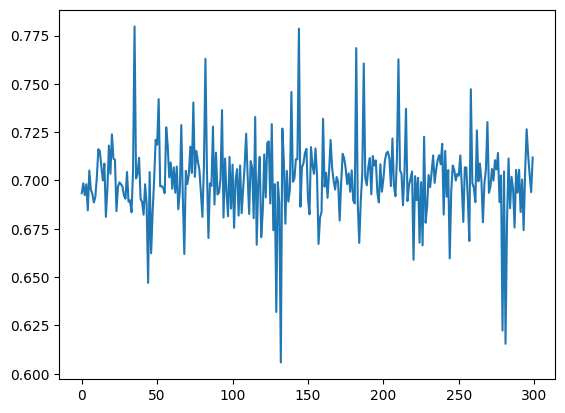

In [ ]:
plt.plot(history['gen'])

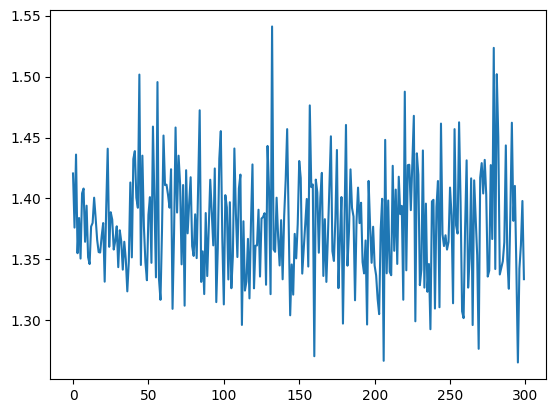

In [ ]:
plt.plot(history['dis'])

In [ ]:
y_test=df.label
x_test=df.drop('label',axis=1).values.reshape(-1,1,8)